In [39]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<matplotlib.contour.QuadContourSet instance at 0x2b9b731e9c20>

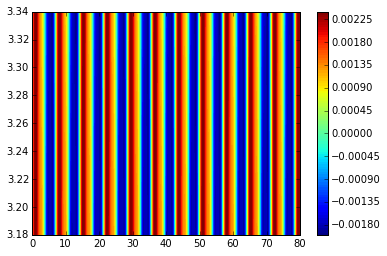

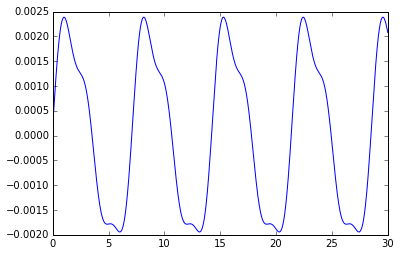

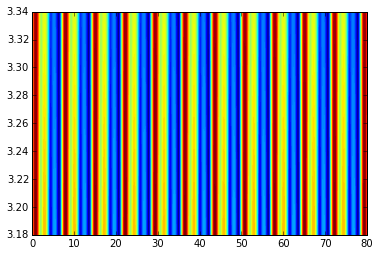

In [42]:
g = 9.81
d = 0.25

c = (g * d) ** .5

x = np.linspace(3.18, 3.34, 100)
t = np.linspace(0, 80, 2000)
z = np.linspace(0, d, 200)

T, X = np.meshgrid(t, x)

def coeffs(f):
    k = 2 * np.pi * f / c
    s = 2 * np.pi * f
    return k, s

def u_field(f, H=1):
    k, s = coeffs(f)
    
    A = f * np.pi * H / (k * d)
    
    return A * np.sin(k * x[:, None]) * np.exp(-1j * s * t)

def w_field(f, H=1):
    k, s = coeffs(f)
    
    A = f * np.pi * H * (z[:, None, None] / d)

    return A * np.sin(k * x[None, :, None]) * np.exp(-1j * s * t[None, None, :])
    

amplitudes = [ 0.17741935+1.39850697j, -0.07362166-0.44333737j,  0.07646525-0.34410119j]
frequencies = [0.14, 0.28, 0.42]

total_u = (1 / 2000) * np.sum(amplitudes[i] * u_field(frequencies[i]) for i in range(3))

total_w = np.sum(amplitudes[i] * w_field(frequencies[i]) for i in range(3))

plt.figure()
plt.contourf(T, X, total_u, 100)
plt.colorbar()

plt.figure()
plt.plot(t, total_u.mean(axis=0))
plt.xlim(0, 30)

plt.figure()
plt.contourf(T, X, total_w[-1], 100)